XXX 책과 상이한 결과

- 입력데이터가 다른 듯(kodex200, kodex200x2)

In [1]:
from settings import *

In [2]:
tickers  = ['kodex200', 'kodex200x2']
read_df = get_data()
data = read_df[tickers].copy()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kodex200    5433 non-null   float64
 1   kodex200x2  5433 non-null   float64
dtypes: float64(2)
memory usage: 127.3 KB


In [3]:
s = '2000-1-4'
e = '2021-12-30'

In [4]:
dd = pd.DataFrame()
dd.index = pd.date_range(s, e, freq='D')
denominator = len(pd.date_range(s, e, freq='D'))/len(pd.date_range(s, e, freq='Y'))
dd['현금'] = pow(1.03, 1/denominator)
dd['현금'] = dd['현금'].shift(1, fill_value=1.0)
dd['현금'] = dd['현금'].cumprod()
#%%
data = pd.merge(data, dd, left_index=True, right_index=True, how='left')

In [5]:
data

,kodex200,kodex200x2,현금
Date,,,
2000-01-04,9022.193,9624.139,1.000
2000-01-05,8403.056,8301.797,1.000
2000-01-06,8186.067,7871.797,1.000
2000-01-07,8083.055,7672.495,1.000
2000-01-10,8413.149,8297.994,1.000
...,...,...,...
2021-12-24,40115.000,24180.000,1.859
2021-12-27,39880.000,23905.000,1.860
2021-12-28,40205.000,24225.000,1.860


In [6]:
def strategy_static(name, data, weights):
    s = bt.Strategy(name, 
            [
                bt.algos.RunMonthly(run_on_end_of_period=True),
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(**weights),
                PrintTempWeights(),
                bt.algos.Rebalance(),
                # bt.algos.PrintInfo('{now} {name} {_price} {temp} \n{_universe}')
            ])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [7]:
bt코스피20현금80 = strategy_static("코스피20%+현금80%",   data[['kodex200', '현금']], 
                               {'kodex200': 0.2, '현금':0.8}) 
bt코스피레버리지10현금90 = strategy_static("코스피레버리지10%+현금90%", data[['kodex200x2', '현금']], 
                                  {'kodex200x2': 0.1, '현금':0.9}) 

In [8]:
r_all = bt.run(bt코스피20현금80, bt코스피레버리지10현금90)

2000-01-04 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-01-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-02-29 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-03-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-04-28 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-05-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-06-30 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-07-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-08-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-09-29 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-10-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-11-30 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2000-12-26 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-01-31 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-02-28 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-03-30 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-04-30 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-05-31 00:

<AxesSubplot:title={'center':'Equity Progression'}>

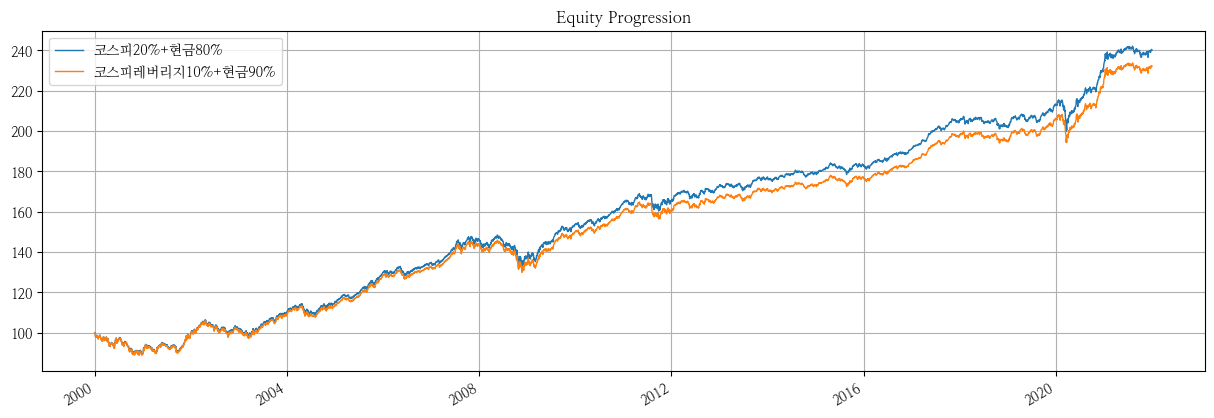

In [9]:
r_all.plot()

In [10]:
r_all.display()

Stat                 코스피20%+현금80%    코스피레버리지10%+현금90%
-------------------  -------------------  ---------------------------
Start                2000-01-03           2000-01-03
End                  2021-12-30           2021-12-30
Risk-free rate       0.00%                0.00%

Total Return         140.04%              132.01%
Daily Sharpe         0.88                 0.86
Daily Sortino        1.41                 1.37
CAGR                 4.06%                3.90%
Max Drawdown         -10.87%              -11.21%
Calmar Ratio         0.37                 0.35

MTD                  1.49%                1.49%
3m                   0.45%                0.47%
6m                   -0.68%               -0.60%
YTD                  2.95%                2.93%
1Y                   2.95%                2.93%
3Y (ann.)            5.92%                5.99%
5Y (ann.)            4.66%                4.71%
10Y (ann.)           3.81%                3.77%
Since Incep. (ann.)  4.06%                3.90

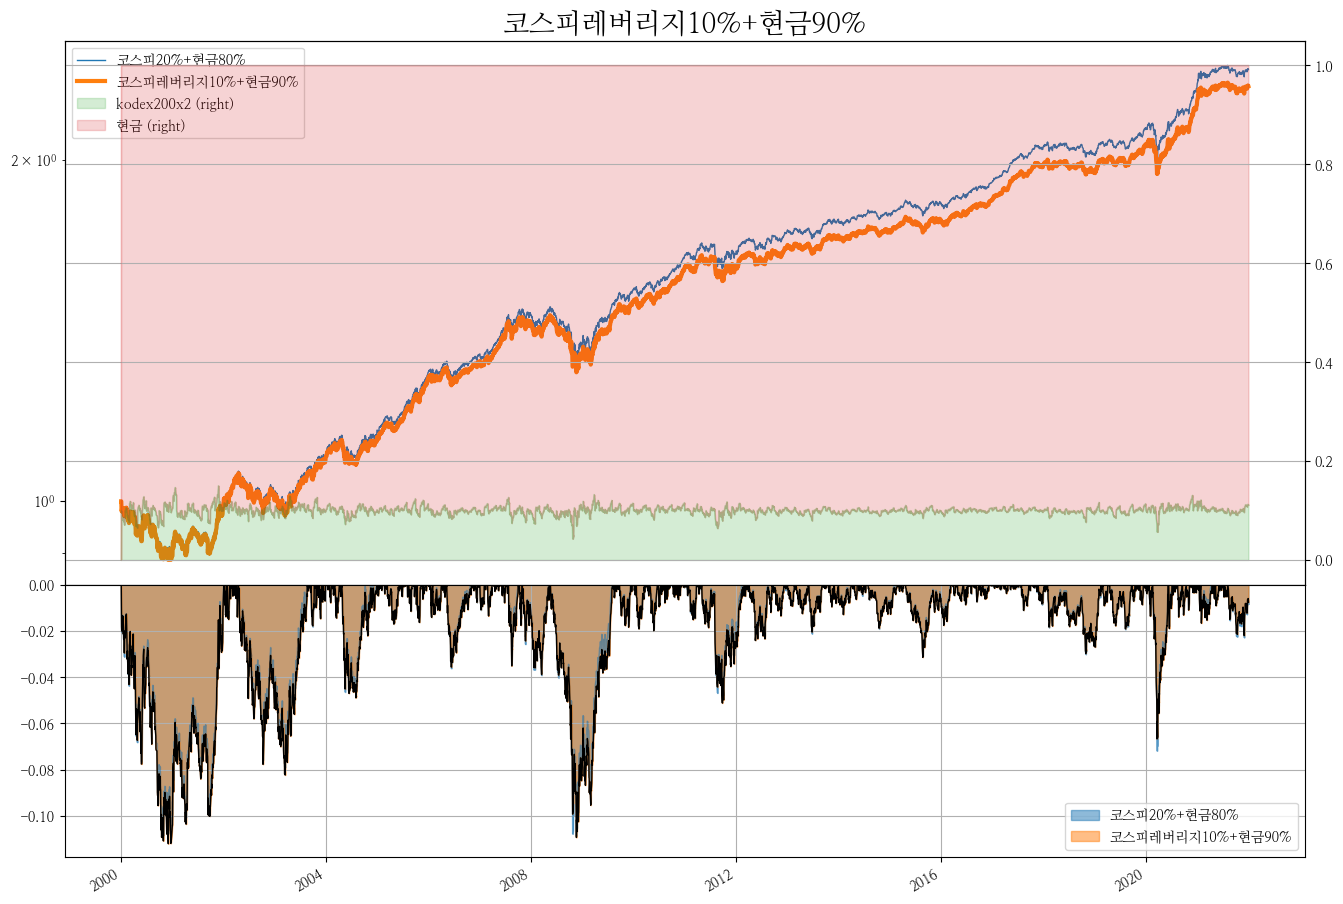

In [11]:
plot_assets(r_all, '2000', '2021', '코스피레버리지10%+현금90%')

## WeighFixedRateAverageMomentumScore

In [12]:
# - 주식에 투자할 고정비율을 정함 : 25%
# - 매월 말 코스피지수의 12개월 평균 모멘텀 스코어를 구한다.
# - 미리 정해놓은 고정비율(25%)와 평균 모멘텀 스코어를 곱한 비율이 주식투자비율, 나머지가 현금비율
# - 매월 말 이 비율을 계산하여 리밸런싱한다
#   - 코스피 고정 투자 비율 25%, 코스피 평균 모멘텀 스코어 0.5 인 경우
# - 주식투자비율 = 25% x 0.5 = 12.5%,
# - 현금 투자비율 = 100% - 12.5% = 87.5%
# - 현금비율 추가하면 (1:1로 섞기 때문에 나누기 2를 해준다.)
#     - 주식투자비율 : 25%(고정비율) x 0.5(평균모멘텀스코어) x 현금비율/2  
#     - 현금투자비율 : 1 - 주식투자비율
class WeighFixedRateAverageMomentumScore(bt.Algo):
    def __init__(self, months=12, lag=pd.DateOffset(days=0), fixed_rate=0.25, 
                 cash='현금', cash_weigh=0.0, 현금자산제외=True):
        """ 고정비율*평균모멘텀스코어 비율 만큼 투자
        
            months : 모멘텀스코어 계산하는 개월수
            lag : 현재에서 얼마만큼 lag를 줄 것인지 결정
            fixed_rate : 주식에 투자할 고정 비율
            cash : cash자산 이름(기본값: 현금)
            cash_weigh : 현금비중 (기본값: 0 -> 고려하지 않음), 현금비중 올라감
            현금자산제외 : 모멘텀스코어 계산시 현금을 하나의 자산으로 취급할지를 결정 (기본값 : True)
                        False인 경우 현금을 하나의 자산으로 취급하면 그만큼 현금비중이 올라감
        """
        super(WeighFixedRateAverageMomentumScore, self).__init__()
        self.lookback = months
        self.lag = lag
        self.fixed_rate = fixed_rate
        self.cash = cash
        self.cash_weigh = cash_weigh
        self.현금자산제외 = 현금자산제외

    def __call__(self, target):
        selected = target.temp['selected'].copy()

        if self.현금자산제외: # 현금자산빼고 모멘텀 비중나누고 나머지는 현금으로 , 아니면 현금도 하나의 자산으로
            selected.remove(self.cash)

        t0 = target.now - self.lag

        if target.universe[selected].index[0] > (t0 - pd.DateOffset(months=self.lookback)): # !!!
            return False

        momentums_score = 0
        for lookback in range(1, self.lookback+1):
            start = t0 - pd.DateOffset(months=lookback)
            prc = target.universe[selected].loc[start:t0]
            momentum_score = np.where(prc.calc_total_return() > 0, 1, 0)
            momentums_score += momentum_score

        average_momentum_score = momentums_score / self.lookback
#         print(average_momentum_score)

        average_momentum_score *= (1 - self.cash_weigh)
        
        # XXX systrader79/backtesting/ebook/dynamic/10.mxied_korea_us.py 수정필요
        if self.현금자산제외: ## XXX 이 로직이 맞는지 모르겠음
            weights = average_momentum_score/len(selected)
            weights *= self.fixed_rate #!!!! 추가
            weights = pd.Series(weights, index=selected)
            weights[self.cash] = 1-weights.sum()
        else:
            weights = average_momentum_score/average_momentum_score.sum()
            weights = pd.Series(weights, index=selected)


        target.temp['weights'] = weights

        return True

In [13]:
def average_momentum_score_fixed_rate(name, data, months=12, lag=pd.DateOffset(days=0), 
                                        fixed_rate=0.25, cash='현금', 현금자산제외=False):
    st = bt.Strategy(name,
        [
            bt.algos.RunMonthly(run_on_first_date=True,
                                run_on_end_of_period=True, #월말
                                run_on_last_date=False),
            bt.algos.SelectAll(),
            WeighFixedRateAverageMomentumScore(months, lag, fixed_rate,
                                               cash, 0,  현금자산제외),
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
    )
    return bt.Backtest(st, data, initial_capital=100000000)

In [14]:
bt레버리지모멘텀 = average_momentum_score_fixed_rate(
               "레버리지고정비율+모멘텀", data[['kodex200x2', '현금']], 
               12, pd.DateOffset(days=1), 
               0.25, '현금', 현금자산제외=True)
r레버리지모멘텀 = bt.run(bt레버리지모멘텀)

2001-01-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.062 현금:0.938 
2001-02-28 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.062 현금:0.938 
2001-03-30 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.000 현금:1.000 
2001-04-30 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.083 현금:0.917 
2001-05-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.167 현금:0.833 
2001-06-29 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.083 현금:0.917 
2001-07-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.000 현금:1.000 
2001-08-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.104 현금:0.896 
2001-09-28 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.000 현금:1.000 
2001-10-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.021 현금:0.979 
2001-11-30 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.208 현금:0.792 
2001-12-28 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.229 현금:0.771 
2002-01-31 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.250 현금:0.750 
2002-02-28 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.250 현금:0.750 
2002-03-29 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.250 현금:0.750 
2002-04-30 00:00:00 레버리지고정비율+모멘텀 kodex200x2:0.229 현금:0.771 
2002-05-31 00:00:00 레버리지고정비율+모멘텀 kodex20

In [15]:
bt모멘텀 = average_momentum_score_fixed_rate(
             "고정비율+모멘텀", data[['kodex200', '현금']], 
             12, pd.DateOffset(days=1), 
             0.25, '현금', 현금자산제외=True)
r모멘텀 = bt.run(bt모멘텀)

2001-01-31 00:00:00 고정비율+모멘텀 kodex200:0.083 현금:0.917 
2001-02-28 00:00:00 고정비율+모멘텀 kodex200:0.062 현금:0.938 
2001-03-30 00:00:00 고정비율+모멘텀 kodex200:0.062 현금:0.938 
2001-04-30 00:00:00 고정비율+모멘텀 kodex200:0.083 현금:0.917 
2001-05-31 00:00:00 고정비율+모멘텀 kodex200:0.167 현금:0.833 
2001-06-29 00:00:00 고정비율+모멘텀 kodex200:0.083 현금:0.917 
2001-07-31 00:00:00 고정비율+모멘텀 kodex200:0.083 현금:0.917 
2001-08-31 00:00:00 고정비율+모멘텀 kodex200:0.104 현금:0.896 
2001-09-28 00:00:00 고정비율+모멘텀 kodex200:0.000 현금:1.000 
2001-10-31 00:00:00 고정비율+모멘텀 kodex200:0.125 현금:0.875 
2001-11-30 00:00:00 고정비율+모멘텀 kodex200:0.229 현금:0.771 
2001-12-28 00:00:00 고정비율+모멘텀 kodex200:0.250 현금:0.750 
2002-01-31 00:00:00 고정비율+모멘텀 kodex200:0.250 현금:0.750 
2002-02-28 00:00:00 고정비율+모멘텀 kodex200:0.250 현금:0.750 
2002-03-29 00:00:00 고정비율+모멘텀 kodex200:0.250 현금:0.750 
2002-04-30 00:00:00 고정비율+모멘텀 kodex200:0.229 현금:0.771 
2002-05-31 00:00:00 고정비율+모멘텀 kodex200:0.208 현금:0.792 
2002-06-28 00:00:00 고정비율+모멘텀 kodex200:0.146 현금:0.854 
2002-07-31 00:00:00 고정비율+모멘텀

In [16]:
bt고정비율 = strategy_static("고정비율",   data[['kodex200', '현금']], 
                         {'kodex200': 0.25, '현금':0.75}) 
bt레버리지고정비율 = strategy_static("레버리지고정비율",   data[['kodex200x2', '현금']], 
                             {'kodex200x2': 0.25, '현금':0.75}) 
r고정비율 = bt.run(bt고정비율)
r레버리지고정비율 = bt.run(bt레버리지고정비율)

2000-01-04 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-01-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-02-29 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-03-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-04-28 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-05-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-06-30 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-07-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-08-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-09-29 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-10-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-11-30 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2000-12-26 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-01-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-02-28 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-03-30 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-04-30 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-05-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-06-29 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-07-31 00:00:00 고정비율 kodex200:0.250 현금:0.750 


In [17]:
r_all = bt.run(bt고정비율, bt모멘텀, bt레버리지고정비율, bt레버리지모멘텀)

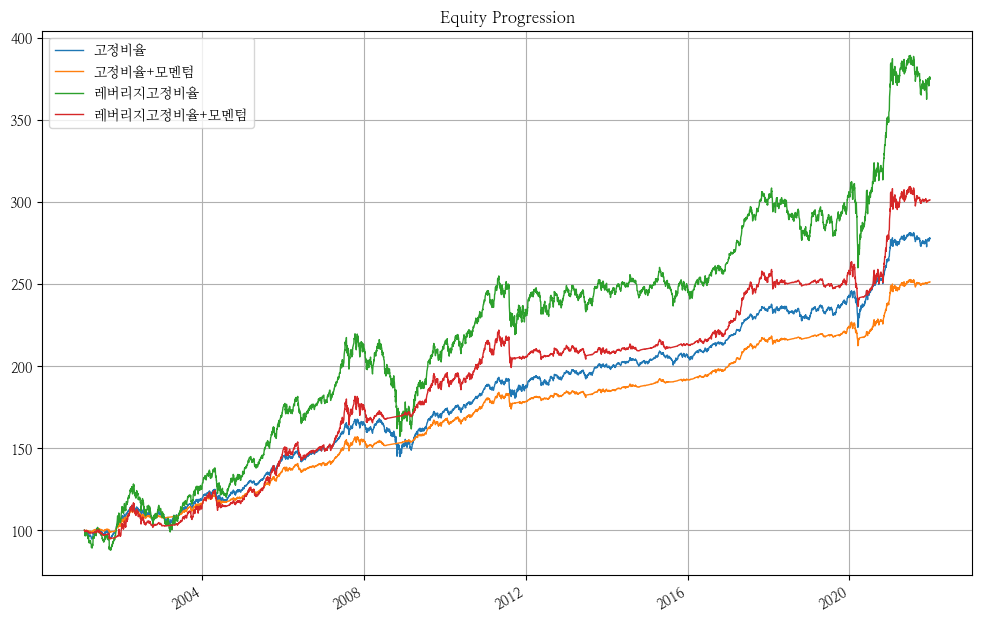

In [18]:
r_all.set_date_range('2001-01-31')
r_all.plot(figsize=(12,8));

In [19]:
r_all.display()

Stat                 고정비율    고정비율+모멘텀    레버리지고정비율    레버리지고정비율+모멘텀
-------------------  ----------  -----------------  ------------------  -------------------------
Start                2001-01-31  2001-01-31         2001-01-31          2001-01-31
End                  2021-12-30  2021-12-30         2021-12-30          2021-12-30
Risk-free rate       0.00%       0.00%              0.00%               0.00%

Total Return         177.65%     151.32%            274.80%             201.29%
Daily Sharpe         0.93        1.27               0.65                0.84
Daily Sortino        1.50        2.01               1.04                1.30
CAGR                 5.00%       4.51%              6.52%               5.42%
Max Drawdown         -13.76%     -6.33%             -28.44%             -12.84%
Calmar Ratio         0.36        0.71               0.23                0.42

MTD                  1.80%       0.49%              3.37%               0.49%
3m                   0.39%       0.42%     